#IBM Data Science Capstone Project: New York Dataset


#Introduction:

> New York City is the most populous city in USA and one of the most diverse. Approximately 36 percent of the City's population is foreign born. The culture of food in New York is one to envy. Being such a multi-cultural city, one can find mouthwatering delicacies of various cuisines from around the world. New York has a plethora of establishments which are fiercely competitive. The culinary diversity of New York City ranges from Mexican, Korean, American Burgers and Soul Food to Turkish Döners and Italian to Indian food.
> The project explores the best locations for opening an Indian Restaurant in New York City. This information can be used to make good business decisions to open a Restaurant in the New York City or for individuals to decide which Indian Restaurant to visit based on ratings.
> This project can be classified as a Location-based Recommendation Project.

#Problem: 

1. For individuals wanting to patronise a restaurant that serves Indian food, what is the best location in New York City to have Indian Food?
2. For an invesstory wanting to get into the Restaurant Business for serving Indin cuising, what is potentially the best location in NYC to open an Indian Restaurant? 

#Data:

1. The dataset used is the New York City Dataset which can be found here: https://cocl.us/new_york_dataset. The data comes in JSON files and is easily readable with Pandas.  

2. Neighborhood, Borough, Latitude and Longitude are the attributes found in the main dataset.

3. The data pertaining to locations and ratings of the Indian Restaurants is gained from the FourSquare Developer API.

4. There are no missing values in the dataset. 

5.  For geo-spatial visualization of the data, I have used Folium. For GeoCoding, I use GeoPy

#Methodology:
1. Load the dataframe from: https://cocl.us/new_york_dataset
2. Convert the JSON file to a Pandas dataframe.
3. Use foursquare developer API to locate the venues and get their ratings.
4. Analyse and conclude.

In [ ]:
import io
import requests
import zipfile as ZipFile

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium

from geopy.geocoders import Nominatim
import json
from pandas.io.json import json_normalize

from sklearn.cluster import KMeans

print('Libraries Imported')

Libraries Imported


In [ ]:
 !wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [ ]:
with open('newyork_data.json') as json_data:
  newyork_data = json.load(json_data)

newyork_data

{'bbox': [-74.2492599487305,
  40.5033187866211,
  -73.7061614990234,
  40.9105606079102],
 'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}, 'type': 'name'},
 'features': [{'geometry': {'coordinates': [-73.84720052054902,
     40.89470517661],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.1',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661],
    'borough': 'Bronx',
    'name': 'Wakefield',
    'stacked': 1},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-73.82993910812398, 40.87429419303012],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.2',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.874294193

In [ ]:
neighborhoods_data = newyork_data['features']

In [ ]:
neighborhoods_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

In [ ]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [ ]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [ ]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [ ]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [ ]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#Initial Visualization:


Visualising the number of Neighborhoods in each Borough. 

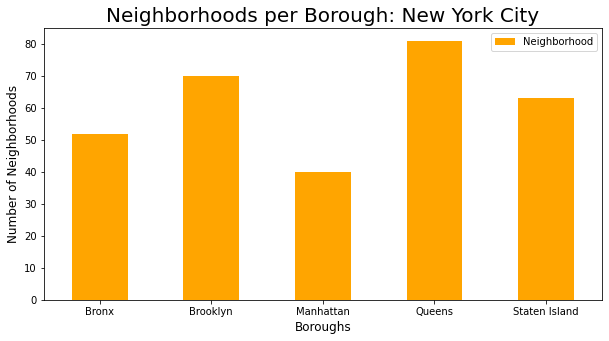

In [ ]:
neighborhoods.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color='orange')
plt.title('Neighborhoods per Borough: New York City', fontsize = 20)
plt.xlabel('Boroughs', fontsize = 12)
plt.ylabel('Number of Neighborhoods',fontsize = 12)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

<b> The number of Neighborhoods in the Borough of Manhattan are the least among all the Boroughs of New York City. </b>

Visualizing all the neighborhoods in the city of New York using Folium. 

In [ ]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [ ]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

#Defining Foursquare developer credentials.

In [ ]:
CLIENT_ID = 'RA5AKLFHHLXULGL1RVB0GKYK3CC03H4AOQHH1WIZ4FZWJMTN' # your Foursquare ID
CLIENT_SECRET = 'FI2QBIQ1LJRGA1RYDZHPG2RXVYCV1SI2WFA0LKNVYTTYMBSC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 500 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RA5AKLFHHLXULGL1RVB0GKYK3CC03H4AOQHH1WIZ4FZWJMTN
CLIENT_SECRET:FI2QBIQ1LJRGA1RYDZHPG2RXVYCV1SI2WFA0LKNVYTTYMBSC


#Define Functions: 

We define the following functions in order to get the venues and their details viz. ID of the Restaurant, Likes, Ratings, Tips in our chose category: Indian Restaurants.

In [ ]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=600
    LIMIT=500
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Let us see how many Indian Restaurants are there in each neighborhoods and borough.

In [ ]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
ind_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in neighborhoods.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    ind_restaurants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(neighborhoods),')','Indian Restaurants in '+Neighborhood+', '+Borough+':'+str(len(ind_restaurants)))
    print(row)
    for resturant_detail in ind_restaurants.values.tolist():
        id, name , category=resturant_detail
        ind_rest_ny = ind_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Indian Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Indian Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Indian Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Indian Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Indian Restaurants in Riverdale, Bronx:1
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Indian Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Indian Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Indian Restaurants in Woodlawn, Bronx:1
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Indian Restaurants in Norwood, Bronx:0
['Bronx', '

In [ ]:
ind_rest_ny.to_csv('indian_rest_nyc.csv')

In [ ]:
ind_nyc = pd.read_csv('indian_rest_nyc.csv')

In [ ]:
print(ind_nyc.shape)
ind_nyc.head()

(82, 5)


,Unnamed: 0,Borough,Neighborhood,ID,Name
0,0,Bronx,Riverdale,4c04544df423a593ac83d116,Cumin Indian Cuisine
1,1,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
2,2,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill
3,3,Brooklyn,Bay Ridge,545835a1498e820edc6f636f,Bombay Grill
4,4,Brooklyn,Brighton Beach,4af0d31bf964a5207ddf21e3,Pak Nasheman


In [ ]:
ind_nyc = ind_nyc.drop(['Unnamed: 0'], axis = 1)

In [ ]:
ind_nyc.tail()

,Borough,Neighborhood,ID,Name
77,Manhattan,Sutton Place,4fe4fb50c2eee335e4fea69d,Moti Mahal Delux
78,Manhattan,Turtle Bay,4a5b660df964a52015bb1fe3,Amma
79,Manhattan,Turtle Bay,59fcd48c464d6567ed2f5e37,The Kati Roll Company
80,Queens,Sunnyside Gardens,4c48da9f3013a59356c5f0e1,Saffron Garden
81,Queens,Queensbridge,4b1b341bf964a5208af923e3,Five Star Banquet


We get 83 Indian Restaurants through our search parameters using Foursquare API across New York City.

Visualise the number of Indian Restaurants per Borough in New York City


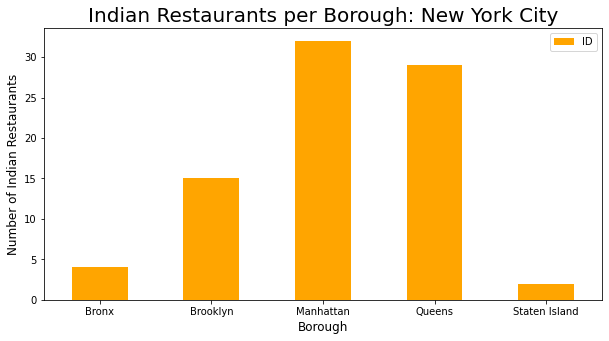

In [ ]:
ind_nyc.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color='orange')
plt.title('Indian Restaurants per Borough: New York City', fontsize = 20)
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('Number of Indian Restaurants', fontsize=12)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [ ]:
ind_nyc[ind_nyc['Borough'] == 'Manhattan'] #List of Indian Restaurants in Manhattan.

,Borough,Neighborhood,ID,Name
18,Manhattan,Washington Heights,4ae7876ef964a5201eac21e3,Kismat Indian Restaurant
19,Manhattan,Hamilton Heights,54c2bd96498eaf5142e3fe92,Clove Indian Restaurant & Bar
20,Manhattan,Hamilton Heights,5914ff32b23dfa207eca38de,Mumbai Masala
21,Manhattan,Manhattanville,529d382a11d2dd5ef107e641,Chapati House - NYC
22,Manhattan,East Harlem,519fe6f5498e30595d370c44,Bawarchi
23,Manhattan,Yorkville,5272ca4511d22488f6895caf,Drunken Munkey
24,Manhattan,Yorkville,56ed855a498ef3bb022352c3,Mughlai Indian Cuisine
25,Manhattan,Yorkville,5b0c8e2d2f97ec002c67a428,Ashoka Fine Dine
26,Manhattan,Upper West Side,591890f43abcaf1ddca66e85,Ashoka
27,Manhattan,Upper West Side,42489a80f964a5208b201fe3,Swagat


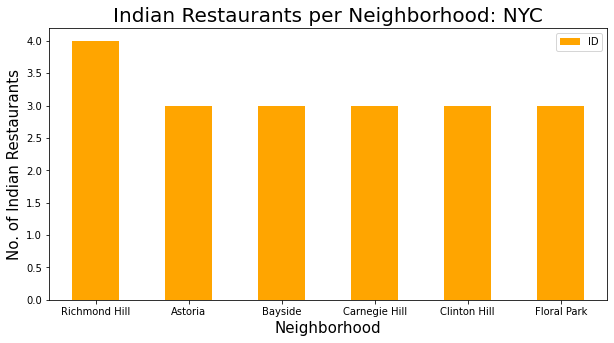

In [ ]:
NOofNeigh = 6 # top number for graphing all the same past 6
ind_nyc.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color='orange')
plt.title('Indian Restaurants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of Indian Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [ ]:
ind_nyc[ind_nyc['Neighborhood']=='Richmond Hill'] #List of the Indian Restaurants in New York City

,Borough,Neighborhood,ID,Name
46,Queens,Richmond Hill,4b522029f964a520f26927e3,Sohna Punjab
47,Queens,Richmond Hill,4f1b77d7e4b044fd359e6d21,India Cafe
48,Queens,Richmond Hill,4adbaef0f964a520ff2921e3,Punjabi Kabab House
49,Queens,Richmond Hill,4babc24ef964a5200ac73ae3,Royal India Palace


Continuing our analysis, Manhattan has the least number of Neighborhoods but it has the highest number of Indian Restaurants. THe Borough of Queens is ranked second among all Boroughs in the number of Indian restaurants in New York City. 
The Neighborhood of Richmond Hill in the Borough 'Queens' has the most amount of Indian Restaurants in a Borough.

Let us get the ranking of each Indian Restaurant based on likes, rating and tips for further analysis. We will assign 0 value for the restaurants as they may have been recently opened or details do not exist in FourSquare Database

In [ ]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats=pd.DataFrame(columns=column_names)
count=1
for row in ind_nyc.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(ind_nyc),')','processed')
    indian_rest_stats = indian_rest_stats.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1


{'meta': {'code': 200, 'requestId': '5fa3c9d390fd6244ff18d958'}, 'response': {'venue': {'id': '4c04544df423a593ac83d116', 'name': 'Cumin Indian Cuisine', 'contact': {}, 'location': {'address': '3549 Johnson Ave', 'lat': 40.886458613786466, 'lng': -73.90981597247142, 'labeledLatLngs': [{'label': 'display', 'lat': 40.886458613786466, 'lng': -73.90981597247142}, {'label': 'entrance', 'lat': 40.886478, 'lng': -73.90987}], 'postalCode': '10463', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3549 Johnson Ave', 'Bronx, NY 10463', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/cumin-indian-cuisine/4c04544df423a593ac83d116', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 9}, 'price': {'tier': 2

In [ ]:
indian_rest_stats.to_csv('indian_rest_stats_ny.csv') #saving the data to a csv file

In [ ]:
print(indian_rest_stats.shape)
indian_rest_stats.info()

(82, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       82 non-null     object 
 1   Neighborhood  82 non-null     object 
 2   ID            82 non-null     object 
 3   Name          82 non-null     object 
 4   Likes         82 non-null     object 
 5   Rating        82 non-null     float64
 6   Tips          82 non-null     object 
dtypes: float64(1), object(6)
memory usage: 4.6+ KB


We get statistics for 82 of the 85 Indian Restaurants in New York City.

In [ ]:
indian_rest_stats['Likes'] = indian_rest_stats['Likes'].astype('float64')
indian_rest_stats['Tips'] = indian_rest_stats['Tips'].astype('float64')
indian_rest_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       82 non-null     object 
 1   Neighborhood  82 non-null     object 
 2   ID            82 non-null     object 
 3   Name          82 non-null     object 
 4   Likes         82 non-null     float64
 5   Rating        82 non-null     float64
 6   Tips          82 non-null     float64
dtypes: float64(3), object(4)
memory usage: 4.6+ KB


#Analysis: Continued

<b> Indian Restaurant with the maximum number of Likes. </b>

In [ ]:
indian_rest_stats.iloc[indian_rest_stats['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                     Midtown
ID              49d91c12f964a520015e1fe3
Name               The Kati Roll Company
Likes                                831
Rating                               8.6
Tips                                 256
Name: 28, dtype: object

<b> Indian Restaurant with the maximum Ratings. </b>

In [ ]:
indian_rest_stats.iloc[indian_rest_stats['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                600
Rating                               9.1
Tips                                 150
Name: 33, dtype: object

<b> Indian Restaurant with the maximum number of Tips. </b>

In [ ]:
indian_rest_stats.iloc[indian_rest_stats['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                     Midtown
ID              49d91c12f964a520015e1fe3
Name               The Kati Roll Company
Likes                                831
Rating                               8.6
Tips                                 256
Name: 28, dtype: object

# Advanced Analysis and Visualization
Identifying and visualizing neighborhoods with the maximum average rating of restaurants

In [ ]:
ny_neighborhood_stats = indian_rest_stats.groupby('Neighborhood', as_index = False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns = ['Neighborhood', 'Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'], ascending = False).head(10)

,Neighborhood,Average Rating
43,Tribeca,9.100000
9,Civic Center,9.100000
32,Noho,8.800000
8,Chelsea,8.800000
18,Gramercy,8.700000
46,Upper West Side,8.650000
0,Astoria,8.633333
19,Greenwich Village,8.633333
29,Midtown,8.600000
48,West Village,8.500000


Above are the top neighborhoods with the highest average ratings of Indian Restaurants. 

In [ ]:
ny_borough_stats = indian_rest_stats.groupby('Borough', as_index = False).mean()[['Borough','Rating']]
ny_borough_stats.columns = ['Borough', 'Average Rating']
ny_borough_stats.sort_values(['Average Rating'], ascending = False).head(10)

,Borough,Average Rating
2,Manhattan,8.321875
4,Staten Island,7.950000
1,Brooklyn,7.466667
0,Bronx,6.675000
3,Queens,6.586207


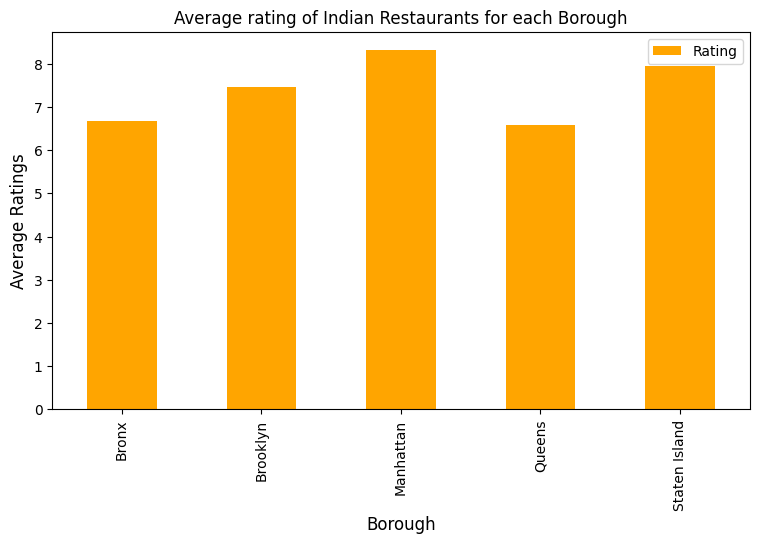

In [ ]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Indian Restaurants for each Borough')
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('Average Ratings', fontsize=12)
indian_rest_stats.groupby('Borough').mean()['Rating'].plot(kind='bar', color='orange')
plt.legend()
plt.show()

Above are the average ratings of Indian Restaurants for each Borough.

### Let us consider all the neighborhoods with an average rating equal to or greater than 8.0. 
We visualise this later on a map.

In [ ]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]

Merging the New York Neighborhood Restaurant Statistics dataset with out original New York Dataset to gain latitude and longitude values.

In [ ]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,neighborhoods, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Astoria,40.768509,-73.915654,8.633333
1,Brooklyn,Boerum Hill,40.685683,-73.983748,8.100000
2,Manhattan,Carnegie Hill,40.782683,-73.953256,8.300000
3,Manhattan,Chelsea,40.744035,-74.003116,8.800000
4,Staten Island,Chelsea,40.594726,-74.189560,8.800000
5,Manhattan,Civic Center,40.715229,-74.005415,9.100000
6,Brooklyn,Fort Greene,40.688527,-73.972906,8.400000
7,Manhattan,Gramercy,40.737210,-73.981376,8.700000
8,Manhattan,Greenwich Village,40.726933,-73.999914,8.633333
9,Manhattan,Manhattan Valley,40.797307,-73.964286,8.100000


#Visualization: 
We visualise our results on a map of New York City using folium.

In [ ]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
            )
    )

In [ ]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add ratings to map
ny_map.add_child(rating)

#Results:
1. <b>Manhattan </b>has the least number of Neighborhoods but it has the highest number of Indian Restaurants.
2. The Neighborhood of <b>Richmond Hill</b> in <b>Queens</b> has the most amount of Indian Restaurants in a Borough.
3. Indian Restaurants in <b>Manhattan</b> have the highest average rating as compared to the ratings of the other Borough average restaurant ratings.
4. The best rated restaurant according to Likes and Tips is <b>The Kati Roll Company </b>neighborhood of <b>Midtown </b>in borough of <b>Manhattan</b>.
5. The best rated Indian Restaurant in New York City is <b> Tamarind Tribeca </b> in the neighborhood of <b> Tribeca </b> in the Borough of <b>Manhattan</b>.
6. <b> Bronx</b> and <b>Staten Island</b> have the least number of Indian Restaurants in New York city.
7. The average rating for restaurants located in Bronx and Queens is the lowest in comparison to the other boroughs.


#Conclusion:
Answering the two original questions, 
1. The best rated Indian Restaurant in New York City for an individual to visit is the <b> Tamarind Tribeca</b> in <b>Tribeca, Manhattan</b>.
2. The borough of Bronx has the <b>least number</b> of Indian Restaurants out of all of the boroughs of New York City. Bronx also has the <b>lowest average rating</b> for its Indian Restaurants. Thus, <b>Bronx</b> would be a good location for an investing and opening an Indian Restaurant in New York City to have the best shot at success.
3. Similarly, based on the visualization of the location of the highly rated restaurants with Folium, the borough of <b> Queens </b> can also be a prospective location for opening a new Indian Restaurant.